# Project 3 - Frequency analysis on floating wind turbine



**Project deadline:** This project is due for submission on Wednesday, 16.06.2022, 23:55. Please check carefully the *About the Projects* section below for further details.
Because of the holidays from 07.06.-10.06., you have three weeks to work on this project. 

**Important:** You have the choice between two projects. This project is a follow up on the lecture on Fourier transforms and how we can use this technique to analyze physical objects and solve such problems. The other project brings the word-game from project2 to a new level. We strongly advise you to read through both project notebooks completely before you take a decision.

**Remark:** This project is stand-alone and you also can work on it if you *did not* work on the Wind turbine in project1. 

**Hand in:** Please continue this notebook and hand this in as .ipynb file at [Projects/Project 3](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html).

## Your name here: Moritz Happel

# Floating wind turbines
Currently, the demand for renewable energy is very high. Wind turbines are very successful sources of renewable energy, and many states are planning new wind farms to increase the fraction of green energy in the overall consumption. Despite the high demand, it is difficult to establish large new onshore (land-based) wind farms due to space limitations: Attention has to be paid to landscape and neighbors.

The same constraints do not limit offshore wind farms. However, a conventional offshore wind turbine has a foundation which stands on the seafloor. The foundations are limited to a certain water depth, since the price and complexity of the foundation scales unfavorably with depth. According to Wikipedia, fixed foundations can be installed at water depth up to around 50 m.

This depth constraint limits the possible wind farm locations to a moderate number of areas in the world where the ocean floor falls off relatively flatly away from the shore. 

Therefore, floating foundations are now being developed by many companies.

While floating wind turbine foundations may solve many problems related to installation of offshore wind, the technologies are still being tested. 

In this project you will work with simulated operational data for a floating foundation fitted with a 15 MW wind turbine. At the present time the average size of offshore wind turbines is on the order of 8 MW, but wind turbines in producing in the range of 15-20 MW are being pursued by many of the manufacturing companies. 


### This project
In this project, we will again consider the dataset we used in the last project. 
The data are simulations of a floating 15 MW offshore turbine. The dataset we used in the previous project is for the 50-year event, an extreme storm which occurs very rarely, on time-scales of 50 years. Under such conditions, the rotor blades are turned such that act as aerodynamic they brakes, and the rotor is only turning at a very slow speed.

In the previous project, we studied the time-domain of this dataset,  i.e. the data presented as values as a function of time. We will now study the data in the frequency domain, i.e. the frequency components of this dataset.



The data contains the values shown in this figure as a function of time. 

<img src="figs/windTurbinePicture1.png" width="600" />






## Necessary Python packages

In [1]:
# Here we import the same modules as in the last version of this project.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np

from IPython.display import display, Markdown, Latex


filename = "data/Orcaflex Simulation, 15 MW wind turbine.csv"

# This one is new, consider what it does. 
units = [pd.read_csv(filename, delimiter = ';', header=2)[key][0] for key in pd.read_csv(filename, delimiter = ';', header=2).keys()]

# We load and save the data.
data = pd.read_csv(filename, delimiter = ';', header=2, skiprows=[3])

From last time we already The data set contains
* Time in s
* Wind speed in m/s
* Sea surface offset from 'flat water' conditions in m. This is the wave height
* Mooring force in kN. This is the force on the anchor lines  
* Tilt in degrees
* Nacelle acceleration in m/s$^2$. The nacelle is the 'house' on top of the turbine where the rotor is attached
* Tower moment in kN m. This is the torque on from the tower moving with respect to the foundation.  

We make arrays out of the different columns. 

In [2]:
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])


In the previous project we considered the behavior of the wind turbine in time-domain. Now we will consider it in frequency domain.

# Your tasks

To solve this project, you should answer the following questions below. 

Remember to choose meaningful x-axes for your plot, as you will that most information is contained at low frequencies. Please also consider when it makes sense to do logarithmic plots.
   
### 1) Fourier transform your variables
Use the numpy real fast fourier transform, np.fft.rfft, on the data, and plot the frequency magnitudes for the different datasets. 

What frequency in the sea surface spectrum has the highest amplitude? What period does this correspond to?

In the previous project we found a strong correlation between the acceleration of the nacelle and the tower moment, following from Newton's 2nd law describing how rotational acceleration translate into a force. Do you also see this in the frequencies?


### 2) Average the Fourier transform
The spectra you plotted in the previous exercise are very noisy.

Write a function which can do an averaged Fourier transform: 
* Snip your time-series into $n$ bits
* Make a Fourier transform of each of the bits
* Mean over the resulting Fourier transforms.

By taking a long time-series, you can get a high frequency resolution. However, the noise level does not change as you measure longer. 
Therefore, by cutting the time series in smaller bits and averaging over the Fourier Transformed signals, we lose frequency resolution, but suppress noise. 

Your function should return the frequencies and the Fourier transform values. 


What happens to the maximal frequency we can measure when we slice the time series into bits?

Test your new function on a 8192-point long signal 
\begin{align}
s(x) = \sum_{f_i} \cos(2\pi f_i x )+\epsilon
\end{align}
for some $x$ with a few frequencies $f_i$ or your choice (start with one frequency component and test it with up to 10 different $f_i$s) and with additional noise $\epsilon$ drawn from a Gaussian distribution around zero. Take a look at the [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)-module to learn how to add Gaussian noise. Observe that you limit noise by averaging.


Does the frequency in the sea surface spectrum with the highest amplitude change much when $n=2,4,8,...$?


We observe two frequency components in the tower moment. One of the frequency components are caused by the turbine eigenfrequency. Which one, and what causes the other one? Compare to the frequency spectra of the other parameters. 

What period does this frequency correspond to?



### 3) Where is the energy?
We have observed that many of the turbine-components oscillate with two frequencies. The energy of a frequency component scales as the square of the frequency amplitude. 

Make a plot which shows the normalized cumulative energy of the mooring - you can use np.cumsum to calculate the cumulative sum. 
Remember to omit the 0th point of the amplitudes. 

What frequency component carries most energy? 


### 4) Creating waves
So far we studied the frequency spectrum of a simulation of a wind turbine subject to a 50-year storm. For such a simulation, the time series for the waves are calculated by taking a known frequency spectrum of waves and transforming these frequencies into sinusoidals which are added together. 

This spectrum is usually drawn from what is called a [JONSWAP-spectrum](https://wikiwaves.org/Ocean-Wave_Spectra). 

In this case, we model the wave-spectrum with a JONSWAP-like spectrum, resulting in a Fourier transform magnitude
\begin{align}
    M(f) = \frac{10^{-7} \,\mbox{Hz}^4 }{f^5}\exp\left(-\frac{3}{4}\left(\frac{f_0}{f}\right)^4\right)\cdot (N+1)/2
\end{align}
where $f$ is the frequency, $f_0$ is the peak frequency, and the constants contain the physical parameter: The wind-speed which gave rise to these waves, the gravitational acceleration, and the drag of the wind on the sea surface. We have already normalized the magnitude by the length of the frequency axis, $N$.

Use your averaging function to plot the frequency spectrum of the actual sea surface. Does this have the same feature as the function $M(f)$? 

Use the inverse fast Fourier transform [np.fft.irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html) on $M(f)$ to create a time series and plot it. This should not look nice - what is going on?


To get a realistic wave-pattern, we also need a phase-component. Create an array of the same length as $M(f)$ with phases drawn from an uniform distribution. 
You can calculate the real and imaginary amplitudes of the Fourier transform from the magnitude and angle by
\begin{align}
    RE\,X + i \, IM\,X = M(X)e^{i \phi(X)}.
\end{align}
Calculate the inverse Fourier transform of your new Fourier spectrum, and compare the calculated waves with the actual waves we expect. How does the wave heights compare? 



For real simulations, a number of wave-spectra are generated with different random number generator seeds. Then an appropriate wave series is chosen based on the properties such as highest and lowest waves. 
Generate three different random phase arrays. Use these three to calculate three wave time-series. How different are the maximum and minimum value of the waves?



In [3]:

def averagedFT(a, t, n=1):
    '''computes the discrete Fouriertransform (FT) of the array a over the time t, 
    if n > 1 a is partioned in to n bits and we average over their FTs'''
    bits = np.array_split(a, n)
    ft = np.zeros(len(a)//(2*n)+1)
    for i in range(0,n):
        ft = ft + np.fft.rfft(bits[i])/n
    frequency = np.linspace(0,1/(t[1]-t[0])/2,len(t)//(2*n) + 1)
    return frequency, ft

def plotSpect(data, t, title, xlim, partition = 1):
    '''plots the spectrum of the data until frequency xlim, taking out the 0-value,
    if partion > 1 we split the data in that many bits average over their FTs'''
    frequency, ft = averagedFT(data, t, partition)
    plt.plot(frequency[1:], np.abs(ft)[1:])
    string = ''
    if partition > 1: string = ', Partition = %d' %partition
    plt.title(title + ' Spectrum' + string)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.xlim(0,xlim)
    plt.show()
    return None

def corr (X1, X2) :
    '''takes in two input arrays X1 and X2 and 
    returns the covriance'''
    stdX1 = np.sqrt(np.mean((X1-np.mean(X1))**2) )
    stdX2 = np.sqrt(np.mean((X2-np.mean(X2))**2) )
    return np.mean((X1-np.mean(X1))*(X2-np.mean (X2)))/(stdX1*stdX2)


## Task 1)

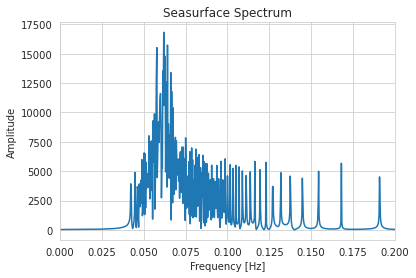

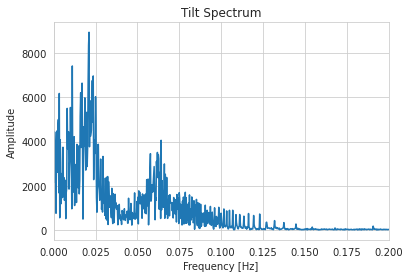

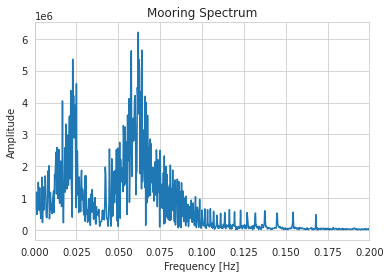

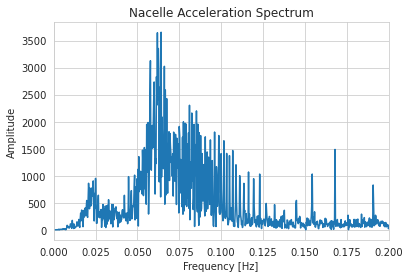

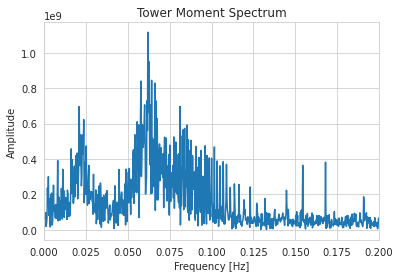

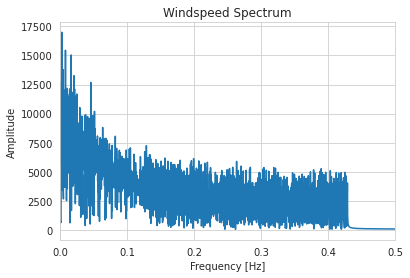

The frequency with the maximal amplitude of the sea surface corresponds to a period of 16.143498 s
The correlation between nac. acc. and tower moment is 0.93380586620838
The correlation between sea surface and tower moment is 0.854775795050524


In [4]:
# plot spectra of the measured data
plotSpect(seaSurface, t, 'Seasurface', 0.2)
plotSpect(tilt, t, 'Tilt', 0.2)
plotSpect(mooring, t, 'Mooring', 0.2)
plotSpect(nacAcc, t, 'Nacelle Acceleration', 0.2)
plotSpect(towerMom, t, 'Tower Moment', 0.2)
plotSpect(windSpeed, t, 'Windspeed', 0.5)

f,fft_nacAcc = averagedFT(nacAcc,t)
f,fft_towerMom = averagedFT(towerMom,t)
f,fft_seaSurface = averagedFT(seaSurface,t)
waveperiod = 1/f[np.argmax(np.fft.rfft(seaSurface))]

print('The frequency with the maximal amplitude of the sea surface corresponds to a period of %f s' %waveperiod)
print('The correlation between nac. acc. and tower moment is', corr(np.abs(fft_nacAcc)[1:], np.abs(fft_towerMom)[1:]))
print('The correlation between sea surface and tower moment is', corr(np.abs(fft_seaSurface)[1:], np.abs(fft_towerMom)[1:]))

## Task 2)

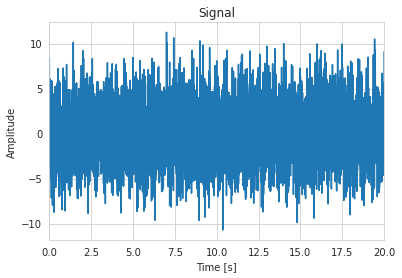

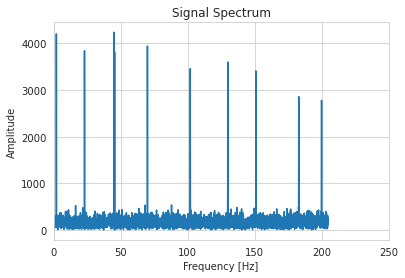

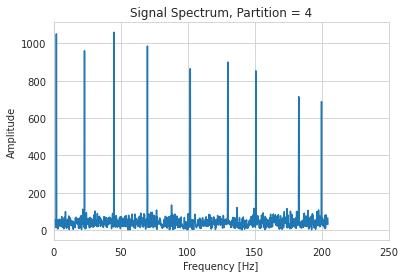

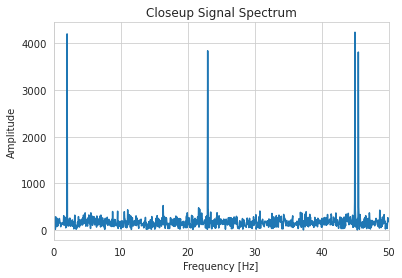

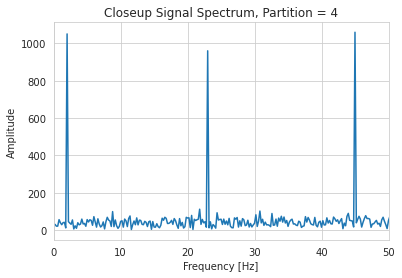

The maximal amplitude frequency of the sea surface spectrum is for a split 
 in 1 parts: 0.061944 Hz
 in 2 parts: 0.057778 Hz
 in 4 parts: 0.057778 Hz
 in 8 parts: 0.057778 Hz
 in 16 parts: 0.057778 Hz


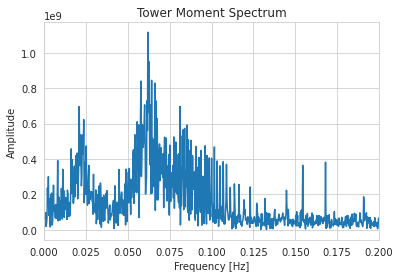

Peaks at 0.020833, 0.061944 Hz
Period of lower peak: 48.000000


In [5]:
# the domain for the test signal
x = np.linspace(0, 20, 2**13)
# some random normal distributed noise
ε = np.random.normal(0, 2,len(x))
# the set of frequencies for the signal
ω = 2*np.pi*np.array([2.,23.,45.,45.5,70.,102.,130.,151.,183.,200.])
# the signal
y = np.sum( np.cos(ω[:, np.newaxis]*x), axis = 0)
# plotting the signal and its spectrum
plt.plot(x,y + ε)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0,20)
plt.title('Signal')
plt.show()

plotSpect(y + ε, x, 'Signal', 250)
plotSpect(y + ε, x, 'Signal', 250, partition=4)
plotSpect(y + ε, x, 'Closeup Signal', 50)
plotSpect(y + ε, x, 'Closeup Signal', 50, partition=4)

# run through differnt partions 
m = np.array([1,2,4,8,16])
print('The maximal amplitude frequency of the sea surface spectrum is for a split ')
for i in m:
    f, a = averagedFT(seaSurface, t, i)
    print(" in %d parts: %f Hz" %(i,f[np.argmax(np.abs(a))]))


plotSpect(towerMom, t, 'Tower Moment', 0.2)    

# compute the peaks of the tower moment
f, a = averagedFT(towerMom, t, 1)
f_small = np.where(f < 0.05, f, 0)
f_large = np.where(f > 0.05, f, 0)
max_lower = f[1:][np.argmax(np.where(f_small!=0, np.abs(a), f_small)[1:])]
max_bigger = f[1:][np.argmax(np.where(f_large!=0, np.abs(a), f_large)[1:])]
print('Peaks at %f, %f Hz'  %(max_lower, max_bigger))
print('Period of lower peak: %f'%(1/max_lower))


The maximal frequency we can measure depends on the sampling rate (measurements per timeintervall) and therefore does not change, what we lose is resolution.

As we can see in the spectra of the test signal for a partitioning of 1 and 4, the maximal frequency we can measure stays the same, but the noise goes down at the cost of resolution: In the noise reduced spectrum we cannot distinguish between the frequencies at 45 and 45.5 anymore

The frequency with the highest amplitude uf the sea surface spectrum does not change much after 2 partitions when we increase the amount further.

The two peaks in the tomer moment spectrum correspond to the frequency peak in the sea surface at 0.057 Hz and the eigenfrequency of the turbine at 0.021 Hz. This corresponds two a period of 47.39 s.

The spectra of the tower moment, nacelle acc, mooring and tilt all have the feature of those two peak frequencies, however in the tilt the peak of the seasurface is the dominant one.

## Task 3)

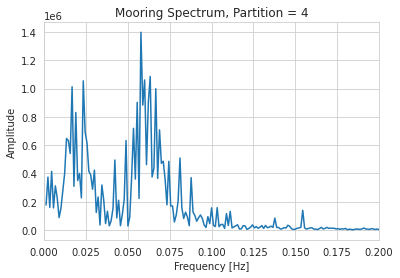

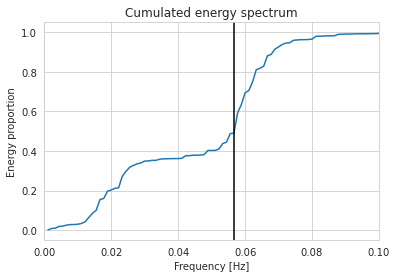

The frequency component with the highest energy is at 0.057778 [Hz]


In [6]:
plotSpect(mooring, t, 'Mooring', 0.2, partition=4)
f, a = averagedFT(mooring, t, 4)
# the energy is proportional to the square of the ampiltude
energy = np.abs(a)**2
# cumulate and normate
cum_energy = np.cumsum(energy[1:])
cum_energy_norm = cum_energy/cum_energy[-1]
# the peak frequency
max_energy_frequency = np.argmax(energy[1:])
# plot cumulated energy
plt.plot(f[1:], cum_energy_norm)
plt.xlim(0,0.1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy proportion')
plt.title('Cumulated energy spectrum')
plt.axvline(x = f[max_energy_frequency], color='k')
plt.show()
print('The frequency component with the highest energy is at %f [Hz]' %f[max_energy_frequency+1])

## Task 4)

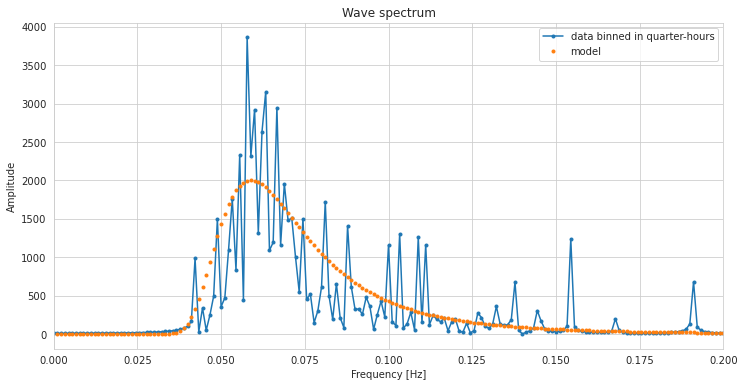

#### If all waves are in phase they mostly destructively interfere

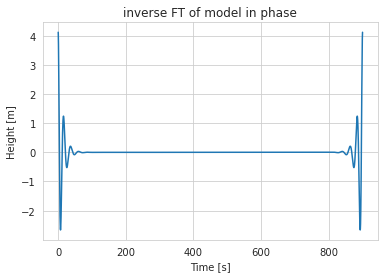

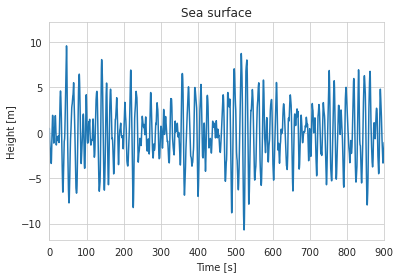

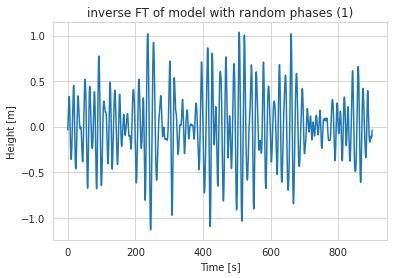

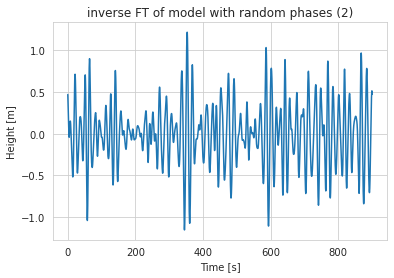

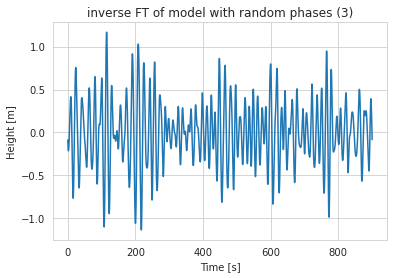

Maxima sea surface offset of fig. (1) 1.04 m
Minima sea surface offset of fig. (1) -1.13 m
---------------------------------------------
Maxima sea surface offset of fig. (2) 1.22 m
Minima sea surface offset of fig. (2) -1.15 m
---------------------------------------------
Maxima sea surface offset of fig. (3) 1.17 m
Minima sea surface offset of fig. (3) -1.14 m


In [7]:
# compute sea surface spectrum and compare to model
f, a = averagedFT(seaSurface, t, 4)
frequency = np.linspace(0,1/(t[1]-t[0])/2,len(t)//(2) + 1)
frequency = f
# the peak frequency used in the model
f_0 = f[np.argmax(a)]
# model spectrum
M = 2.2e-6/(frequency[1:]**5)*np.exp(-5/4*(f_0/frequency[1:])**4)*(len(frequency)+1)/2
# compare data and model in a plot
plt.figure(figsize=(12,6))
plt.plot(f, np.abs(a), '.-', label='data binned in quarter-hours')
plt.plot(frequency[1:], M, '.', label='model')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Wave spectrum')
plt.xlim(0,0.2)
plt.show()

# plot inverse FT of model
display(Markdown('#### If all waves are in phase they mostly destructively interfere'))
m = np.fft.irfft(M, len(t))
plt.plot(t/4,m)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.title('inverse FT of model in phase')
plt.show()

# plot the sea surface
plt.plot(t,seaSurface)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.title('Sea surface')
plt.xlim(0,900)
plt.show()

# three random phase arrays and their corresponding wave model
phase1 = 2*np.pi*np.random.random(len(M))
m1 = np.fft.irfft(M*np.exp(1j*phase1), len(t))
plt.plot(t/4,m1)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.title('inverse FT of model with random phases (1)')
plt.show()

phase2 = 2*np.pi*np.random.random(len(M))
m2 = np.fft.irfft(M*np.exp(1j*phase2), len(t))
plt.plot(t/4,m2)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.title('inverse FT of model with random phases (2)')
plt.show()

phase3 = 2*np.pi*np.random.random(len(M))
m3 = np.fft.irfft(M*np.exp(1j*phase3), len(t))
plt.plot(t/4,m3)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.title('inverse FT of model with random phases (3)')
plt.show()

print('Maxima sea surface offset of fig. (1) %.2f m' %m1[np.argmax(m1)])
print('Minima sea surface offset of fig. (1) %.2f m' %m1[np.argmin(m1)])
print('---------------------------------------------')
print('Maxima sea surface offset of fig. (2) %.2f m' %m2[np.argmax(m2)])
print('Minima sea surface offset of fig. (2) %.2f m' %m2[np.argmin(m2)])
print('---------------------------------------------')
print('Maxima sea surface offset of fig. (3) %.2f m' %m3[np.argmax(m3)])
print('Minima sea surface offset of fig. (3) %.2f m' %m3[np.argmin(m3)])

**More considerations**

These questions are 'bonus questions'. You should not feel obliged to do them at all, and you can also obtain bonus points via good discussion of the previous points.

If we plot the frequency components of the storm wind-speed, we observe that above a certain threshold no more frequencies appear. This is an artefact of the simulations - but it is also a physically valid assumption that we can ignore the high frequency components of the wind speed. Why?

In task 2 we asked you to mean over the signal in frequency domain. Would it make sense to mean in time-domain and Fourier transform this mean?

Could we also mean in a different way?

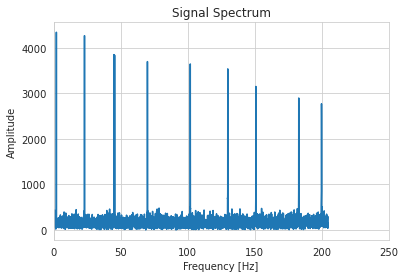

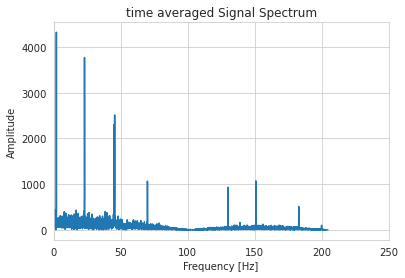

In [8]:
# the domain for the test signal
x = np.linspace(0, 20, 2**13)
# some random normal distributed noise
ε = np.random.normal(0, 2,len(x))
# the set of frequencies for the signal
ω = 2*np.pi*np.array([2.,23.,45.,45.5,70.,102.,130.,151.,183.,200.])
# the signal with noise
y = np.sum( np.cos(ω[:, np.newaxis]*x), axis = 0) + ε 

n = 2**2
# averaging the signal over n data points
y_average = np.zeros(len(y)-n)
for i in range (0,n):
    y_average = y_average + y[i:len(y)-(n-i)]/n


plotSpect(y , x, 'Signal', 250)
plotSpect(y_average, x[:len(x)-n], 'time averaged Signal', 250)

The time scale τ our physical system can change in is limited by its mass and geometry. Frequencies higher than 1/τ have negligable effect

Meanig in time domain by (eg. folding with a rectangular function) loses all frequency information at the averaging timescale (here the peak at about 100 Hz is lost completly. This is not a sensible option at most times!